# Лабораторная работа №2
## Исследование модели системы биометрической аутентификации с использованием методов кластерного анализа
### Вариант №1
#### "Свой": Треугольное распределение
#### "Чужой": Треугольное распределение

In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import triang

warnings.simplefilter(action='ignore', category=FutureWarning)

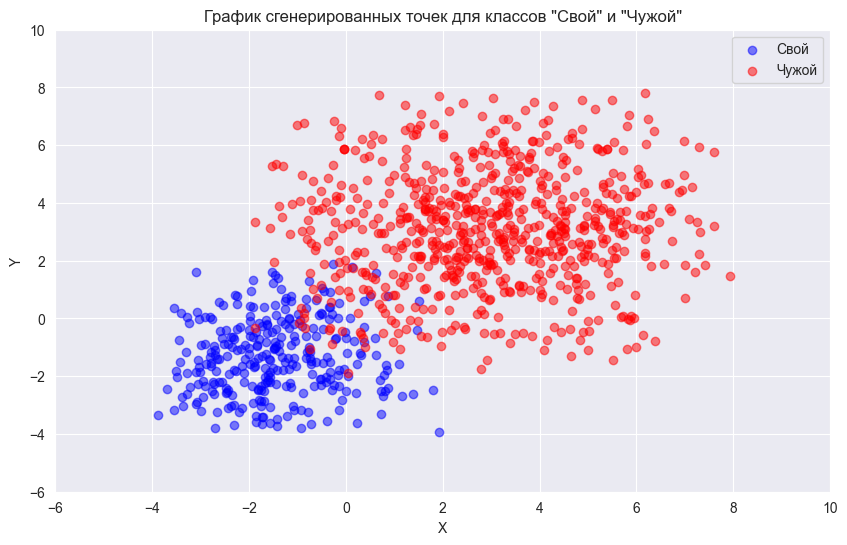

In [15]:
# Функция для генерации треугольного распределения
def generate_triangular_samples(num_samples, a, c, b):
    return triang.rvs((c - a) / (b - a), loc=a, scale=b - a, size=num_samples)

# Шаг 1: Генерация данных
# Параметры для треугольного распределения (класс "Свой").
a_own, c_own, b_own = -4, -2, 2

# Параметры для треугольного распределения (класс "Чужой").
a_foreign, c_foreign, b_foreign = -2, 3, 8

# Количество выборок и размер каждой выборки
num_samples_own = 300
num_samples_foreign = 700

# Генерация выборок для классов "Свой" и "Чужой".
samples_own_x = generate_triangular_samples(
    num_samples_own, a_own, c_own, b_own,
)
samples_own_y = generate_triangular_samples(
    num_samples_own, a_own, c_own, b_own,
)
samples_foreign_x = generate_triangular_samples(
    num_samples_foreign, a_foreign, c_foreign, b_foreign,
)
samples_foreign_y = generate_triangular_samples(
    num_samples_foreign, a_foreign, c_foreign, b_foreign,
)

# Шаг 2: Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(
    samples_own_x, 
    samples_own_y, 
    label='Свой', 
    color='blue', 
    alpha=0.5,
)
plt.scatter(
    samples_foreign_x, 
    samples_foreign_y, 
    label='Чужой', 
    color='red', 
    alpha=0.5,
)
plt.xlim(-6, 10)
plt.ylim(-6, 10)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('График сгенерированных точек для классов "Свой" и "Чужой"')
plt.grid(True)

## Установка порогов

In [16]:
# Центроиды обоих классов
centroid_own = np.array([
    np.mean(samples_own_x), 
    np.mean(samples_own_y),
])
centroid_foreign = np.array([
    np.mean(samples_foreign_x), 
    np.mean(samples_foreign_y),
])
centroid_own, centroid_foreign

(array([-1.44076895, -1.3079138 ]), array([2.94206098, 3.07403874]))

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

num_test_samples_own = 100
num_test_samples_foreign = 100

test_samples_own_x = generate_triangular_samples(
    num_test_samples_own, a_own, c_own, b_own,
)
test_samples_own_y = generate_triangular_samples(
    num_test_samples_own, a_own, c_own, b_own,
)
test_samples_foreign_x = generate_triangular_samples(
    num_test_samples_foreign, a_foreign, c_foreign, b_foreign,
)
test_samples_foreign_y = generate_triangular_samples(
    num_test_samples_foreign, a_foreign, c_foreign, b_foreign,
)

# Объединим тестовые выборки в один массив для классификации
test_samples_x = np.concatenate([test_samples_own_x, test_samples_foreign_x])
test_samples_y = np.concatenate([test_samples_own_y, test_samples_foreign_y])
test_labels = np.concatenate([np.zeros(num_test_samples_own), np.ones(num_test_samples_foreign)])

# Объединим обучающие выборки в один массив для классификации
train_samples_x = np.concatenate([samples_own_x, samples_foreign_x])
train_samples_y = np.concatenate([samples_own_y, samples_foreign_y])
train_labels = np.concatenate([np.zeros(num_samples_own), np.ones(num_samples_foreign)])

# Шаг 5: Классификация методом ближайшего соседа
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(np.column_stack((train_samples_x, train_samples_y)), train_labels)
predictions = knn_classifier.predict(np.column_stack((test_samples_x, test_samples_y)))

# Шаг 6: Рассчет эмпирических коэффициентов корреляции
correlation_own = np.corrcoef(samples_own_x, samples_own_y)[0, 1]
correlation_foreign = np.corrcoef(samples_foreign_x, samples_foreign_y)[0, 1]

# Шаг 7: Корреляционная матрица
correlation_matrix = np.corrcoef(
    samples_own_x.tolist() + samples_own_y.tolist() + samples_foreign_x.tolist() + samples_foreign_y.tolist(),
    rowvar=False
)


In [19]:
correlation_matrix

1.0